In [87]:
from sklearn.datasets import make_blobs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import numpy as np
import time

In [12]:

inputs,target =make_blobs(n_samples=1000, random_state=365, centers=[(-3,3),(0,0),(2,2)])
inputs.shape, target.shape

((1000, 2), (1000,))

In [3]:
data=pd.DataFrame(data=inputs  , columns=['feature1','feature2'])
data['Target']=target
data

,feature1,feature2,Target
0,1.630460,2.094029,2
1,-2.811252,3.852241,0
2,0.501051,1.582531,2
3,-3.624112,3.325318,0
4,-3.278106,2.359416,0
...,...,...,...
995,-4.412271,2.420197,0
996,0.398022,-0.847863,1
997,-0.588974,0.317711,1
998,-2.328593,4.957489,0


In [4]:
knn_palette=sns.color_palette(['#000C1F', '#29757A','#FF5050'])
knn_palette

[(0.0, 0.047058823529411764, 0.12156862745098039),
 (0.1607843137254902, 0.4588235294117647, 0.47843137254901963),
 (1.0, 0.3137254901960784, 0.3137254901960784)]

<Axes: xlabel='feature1', ylabel='feature2'>

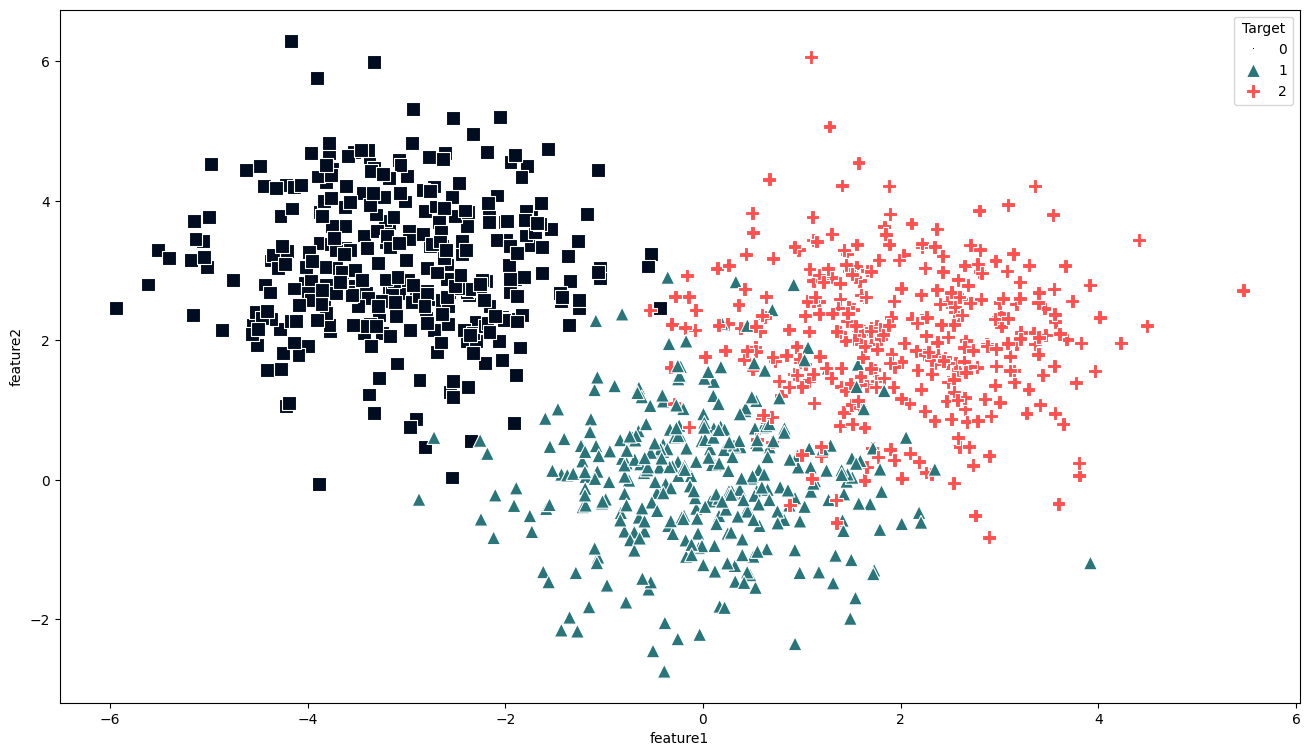

In [5]:
sns.set
plt.figure(figsize=(16,9))
sns.scatterplot(x='feature1',y ='feature2', data=data, hue='Target', palette=knn_palette, markers=[',','^','P'],style='Target', s=100)

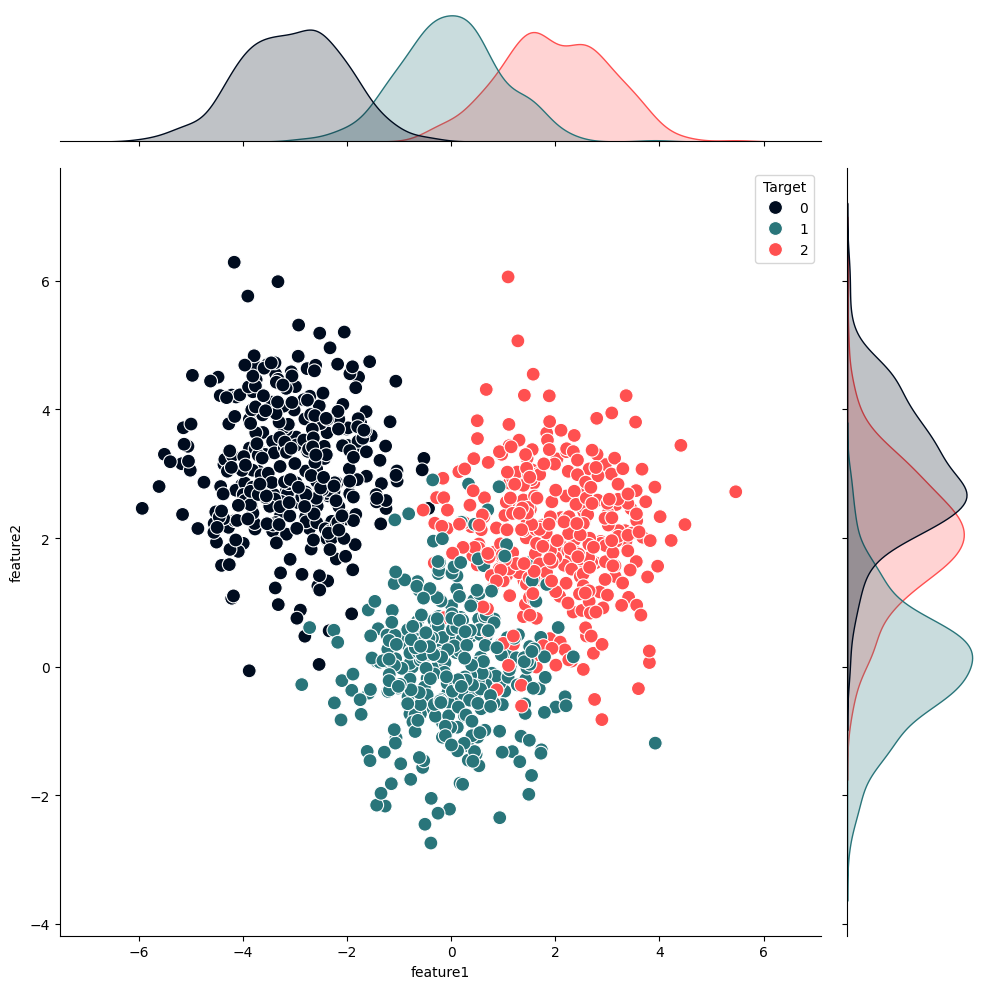

In [6]:
sns.jointplot(x='feature1',y ='feature2', data=data, hue='Target', palette=knn_palette, height=10, s=100, legend=True)


In [7]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=365, stratify=target)


In [61]:
clf =KNeighborsClassifier(n_neighbors = 30, weights='distance')
clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=30, weights='distance')

In [48]:
feature_1 = -0.18
feature_2 =3.2

clf.predict([[feature_1,feature_2]])

array([2])

In [49]:
neighbors=clf.kneighbors([[feature_1, feature_2]])
neighbors

(array([[0.27086818]]), array([[336]]))

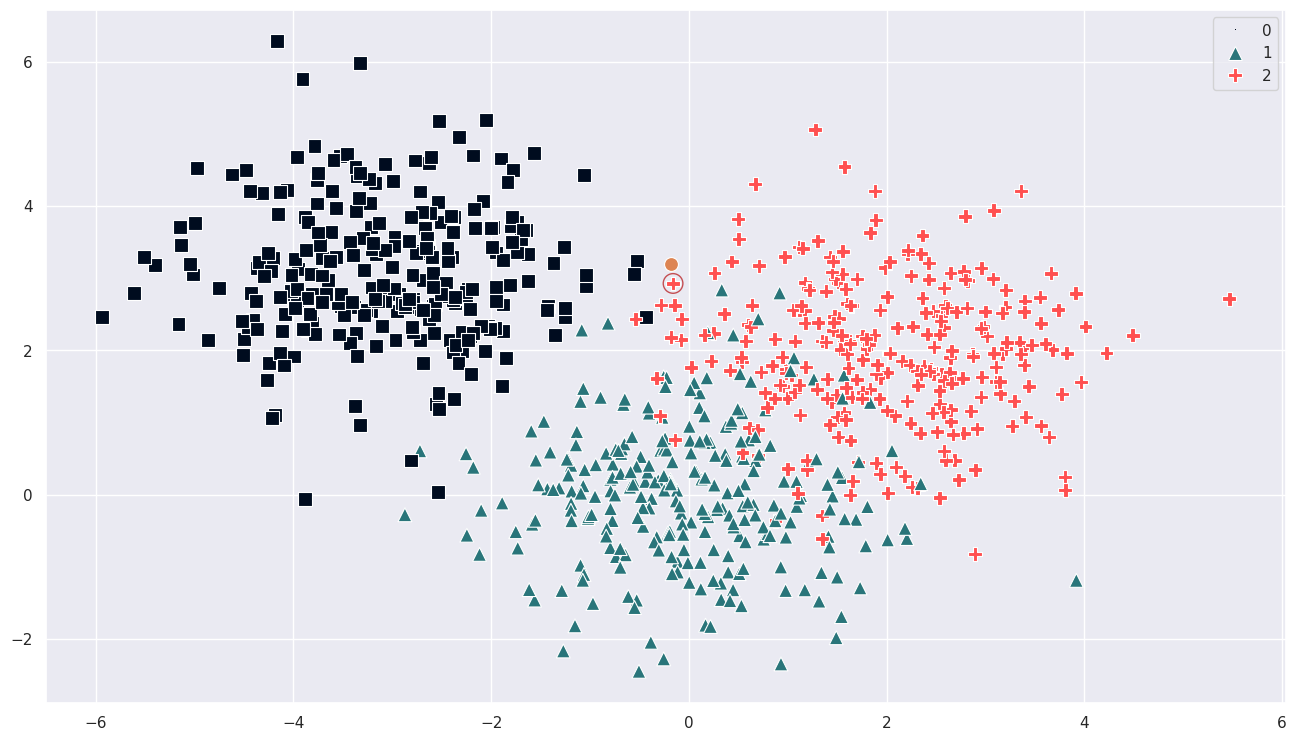

In [50]:
sns.set()
plt.figure(figsize=(16,9))
sns.scatterplot(x=x_train[:,0], y =x_train[:,1],hue= y_train, palette=knn_palette, markers=[',','^','P'],style=y_train, s=100, legend=True)
sns.scatterplot(x=[feature_1], y =[feature_2],style=[feature_2],markers=[ 'o' ], s=100, legend=False)

plot_x_train=[]
plot_y_train=[]

for  i in neighbors[1]:
  plot_x_train.append(x_train[i,0])
  plot_y_train.append(x_train[i,1])

plt.scatter(plot_x_train,
            plot_y_train,
            s=200,
            facecolors='none',
            edgecolors='r');

In [51]:
clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'distance'}

In [52]:
x_train.shape

(800, 2)

Time elapsed:11.8 seconds


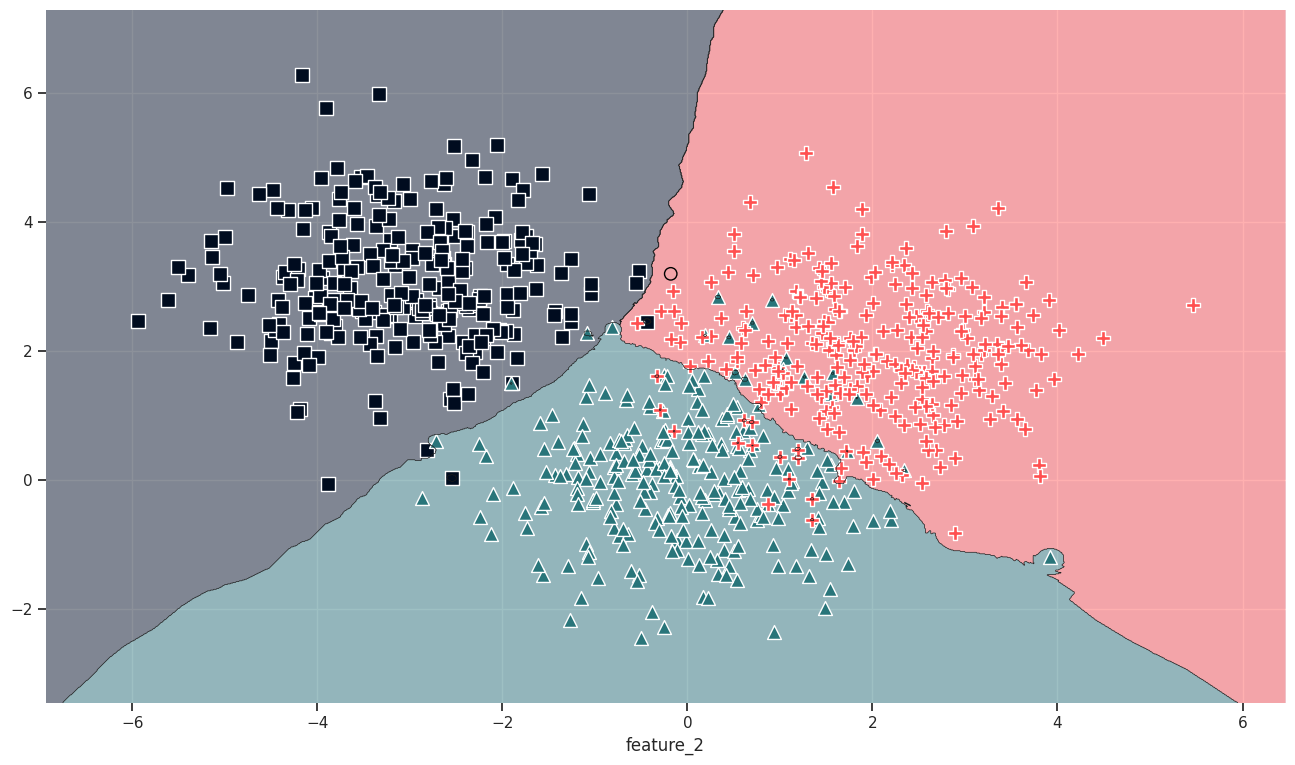

In [62]:
start =time.time()
plt.figure(figsize=(16,9))
plot_decision_regions(X=x_train, y=y_train, X_highlight=np.array([[feature_1, feature_2]]),
                      clf=clf, markers=[',', '^', 'P'],
                      colors='#000c1f,#29757a,#ff5050',
                      scatter_kwargs={'s': 100, 'edgecolor': 'white', 'alpha': 1},
                      legend=0)

plt.xlabel('feature_1')
plt.xlabel('feature_2')
end=time.time()
print(f'Time elapsed:{round( end-start,1)} seconds')

In [68]:
error_uniform = []
error_distance = []

k_range = range(1, 51)

for k in k_range:
    clf_uniform = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    clf_uniform.fit(x_train, y_train)
    predictions_uniform = clf_uniform.predict(x_test)
    error_uniform.append(1 - accuracy_score(y_test, predictions_uniform))

    clf_distance = KNeighborsClassifier(n_neighbors=k, weights='distance')
    clf_distance.fit(x_train, y_train)
    predictions_distance = clf_distance.predict(x_test)
    error_distance.append(1 - accuracy_score(y_test, predictions_distance))


Text(0, 0.5, 'error rate')

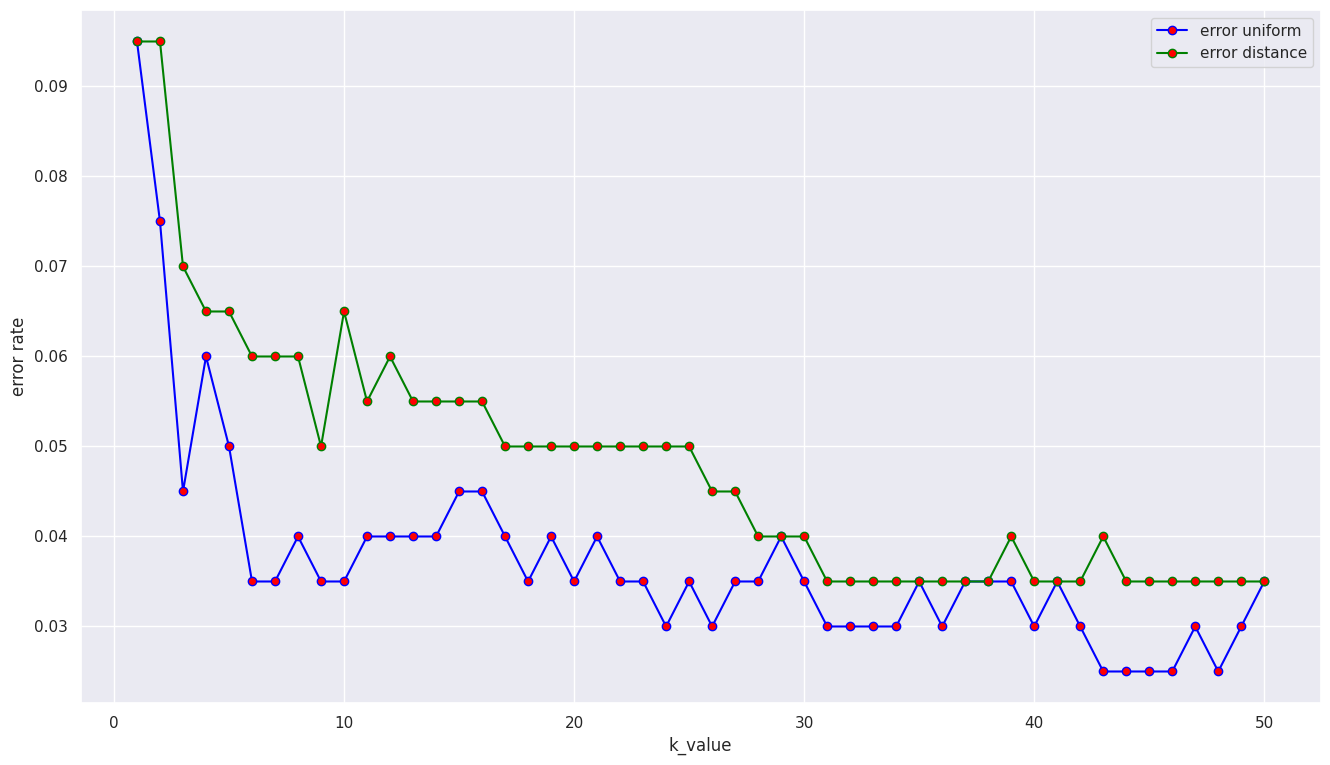

In [73]:
plt.figure(figsize=(16,9))
plt.plot(k_range,error_uniform, c='blue', linestyle='solid',marker='o',markerfacecolor='red',label='error uniform')

plt.plot(k_range,error_distance, c='green', linestyle='solid',marker='o',markerfacecolor='red',label='error distance')

plt.legend()
plt.xlabel('k_value')
plt.ylabel('error rate')

In [75]:
Parameters={'n_neighbors':range(1,51),'weights':['uniform','distance']}

In [76]:
grid_search=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=Parameters,scoring='accuracy')

In [77]:
grid_search.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [78]:
grid_search.best_params_

{'n_neighbors': 10, 'weights': 'uniform'}

In [92]:
clf=grid_search.best_estimator_
clf

KNeighborsClassifier(n_neighbors=10)

In [93]:
grid_search.best_score_

0.9512499999999999

In [94]:
y_test_pred=clf.predict(x_test)
y_test_pred.shape

(200,)

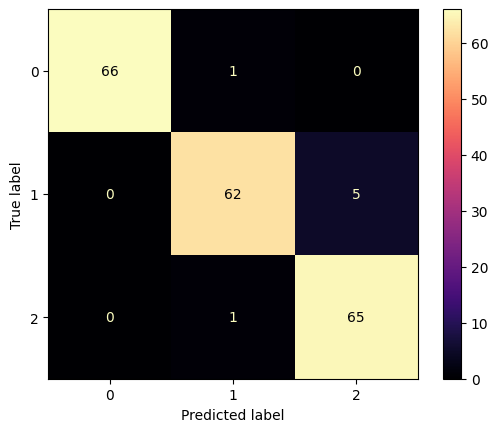

In [97]:
sns.reset_orig()

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred,  labels=clf.classes_, cmap='magma');

In [98]:
print(classification_report(y_test,y_test_pred,target_names=['0','1','2']))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        67
           1       0.97      0.93      0.95        67
           2       0.93      0.98      0.96        66

    accuracy                           0.96       200
   macro avg       0.97      0.97      0.96       200
weighted avg       0.97      0.96      0.97       200

